In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import matplotlib.dates as mdates

import sys
import os

# Lấy đường dẫn thư mục gốc của project
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)
from src.data.loader import load_stock_csv

In [15]:
RAW_DATA_PATH = "../data/raw/VIC.csv"
df = load_stock_csv(RAW_DATA_PATH)

print(f"\033[1mDataset shape:\033[0m {df.shape}")
print(f"\033[1mDate range:\033[0m {df['time'].min()} to {df['time'].max()}")

print("\n\033[1mFirst few rows:\033[0m")
display(df.head())

print("\n\033[1mData types:\033[0m")
print(df.dtypes)

print("\n\033[1mBasic statistics:\033[0m")
display(df.describe())


Dataset shape: (1500, 9)
Date range: 2020-08-03 00:00:00 to 2025-08-01 00:00:00

First few rows:


/home/namdv/workspace/ltsf-transformer-mlops-pipeline/src/data/loader.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["daily_return"].fillna(0, inplace=True)


,time,open,high,low,close,volume,symbol,daily_return,close_log
0,2020-08-03,77.33,78.31,75.56,77.87,164310,VIC,0.000000,4.355041
1,2020-08-04,78.84,78.84,77.69,78.22,229230,VIC,0.004495,4.359525
2,2020-08-05,78.22,78.67,75.38,77.33,434490,VIC,-0.011378,4.348082
3,2020-08-06,78.22,78.40,77.42,77.78,332340,VIC,0.005819,4.353884
4,2020-08-07,77.87,78.40,77.60,77.78,182500,VIC,0.000000,4.353884



Data types:
time            datetime64[ns]
open                   float64
high                   float64
low                    float64
close                  float64
volume                   int64
symbol                  object
daily_return           float64
close_log              float64
dtype: object

Basic statistics:


,time,open,high,low,close,volume,daily_return,close_log
count,1500,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03,1500.000000,1500.000000
mean,2023-05-31 20:30:43.200000,66.962047,67.855153,65.962507,66.945673,3.237043e+06,0.000366,4.141398
min,2020-08-03 00:00:00,39.700000,40.100000,38.700000,39.900000,9.045000e+04,-0.070000,3.686376
25%,2022-01-25 18:00:00,43.350000,43.900000,42.887500,43.337500,1.416521e+06,-0.005730,3.769018
50%,2023-07-31 12:00:00,59.700000,60.800000,58.200000,59.700000,2.085500e+06,0.000000,4.089332
75%,2024-10-29 06:00:00,91.560000,92.800000,89.347500,91.417500,3.419875e+06,0.003824,4.515437
max,2025-08-01 00:00:00,128.000000,129.690000,127.110000,128.000000,2.823433e+07,0.070000,4.852030
std,NaN,23.807897,24.240006,23.308936,23.787486,3.482834e+06,0.018644,0.352849


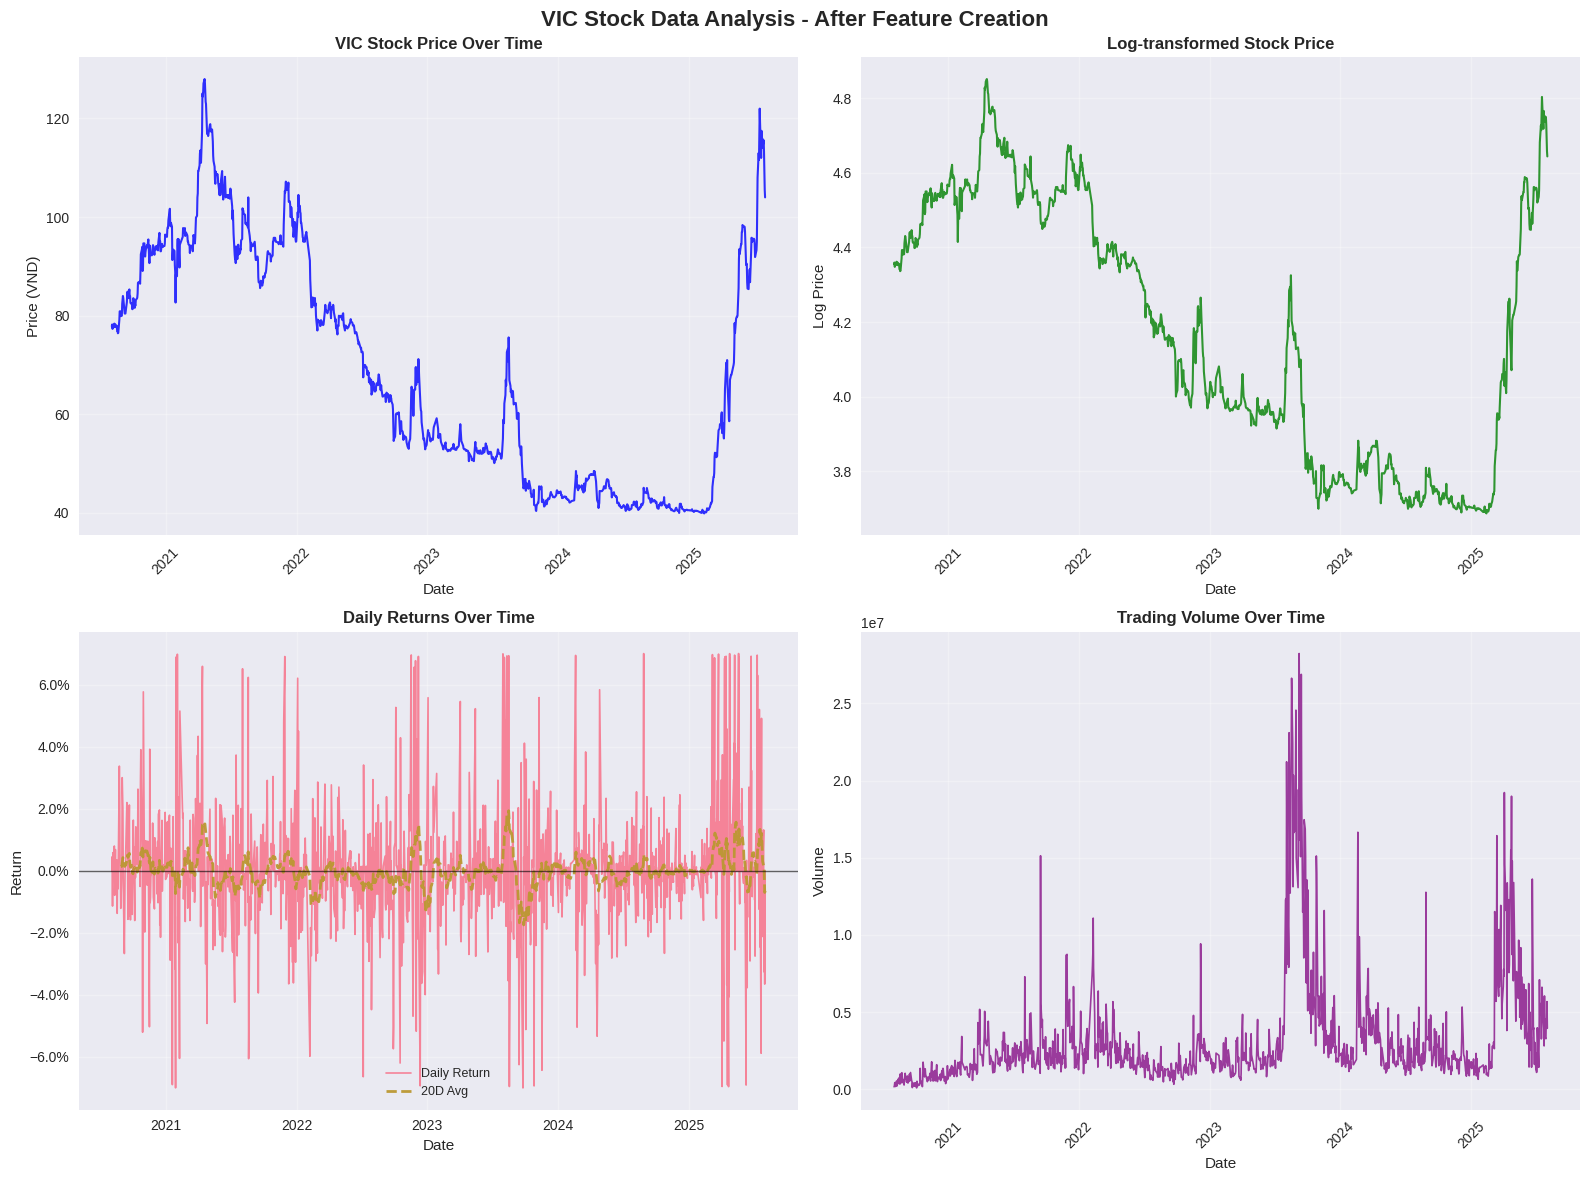

In [17]:
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("VIC Stock Data Analysis - After Feature Creation", fontsize=16,
fontweight="bold")

# 1) Stock Price Over Time
axes[0, 0].plot(df["time"], df["close"], linewidth=1.5, color="blue", alpha=0.8)
axes[0, 0].set_title("VIC Stock Price Over Time", fontsize=12, fontweight="bold")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Price (VND)")
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis="x", rotation=45)

# 2) Log-transformed Price
axes[0, 1].plot(df["time"], df["close_log"], linewidth=1.5, color="green", alpha=0.8)
axes[0, 1].set_title("Log-transformed Stock Price", fontsize=12, fontweight="bold")

axes[0, 1].set_xlabel("Date")
axes[0, 1].set_ylabel("Log Price")
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis="x", rotation=45)

# 3) Daily Returns Over Time
ret_ts = df[["time", "daily_return"]].dropna().copy()
ret_ts["ret_ma20"] = ret_ts["daily_return"].rolling(20).mean()

axes[1, 0].plot(ret_ts["time"], ret_ts["daily_return"], linewidth=1.2, alpha=0.85,
label="Daily Return")
axes[1, 0].plot(ret_ts["time"], ret_ts["ret_ma20"], linewidth=2.0, linestyle="--",
alpha=0.95, label="20D Avg")
axes[1, 0].axhline(0, color="black", linewidth=1, alpha=0.6)
axes[1, 0].set_title("Daily Returns Over Time", fontsize=12, fontweight="bold")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Return")
axes[1, 0].yaxis.set_major_formatter(PercentFormatter(1.0))
axes[1, 0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[1, 0].xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator
()))
axes[1, 0].tick_params(axis="x", rotation=0)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend(fontsize=9)

# 4) Volume Over Time
axes[1, 1].plot(df["time"], df["volume"], linewidth=1.2, color="purple", alpha=0.75)
axes[1, 1].set_title("Trading Volume Over Time", fontsize=12, fontweight="bold")
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("Volume")
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

